In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("dataset_flujo_vehicular.csv")

#splitear la columna fecha
data["hora"] = data["HORA"].str.split(":", n = 1, expand = True)[1]
data["dia"] = data["HORA"].str.split(":", n = 1, expand = True)[0]
data.drop(columns =["HORA"], inplace = True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
print(data.groupby(['LATITUD', "LONGITUD"]).count())

                       CODIGO_LOCACION  CANTIDAD  SENTIDO   hora    dia
LATITUD    LONGITUD                                                    
-34.633299 -58.468594            49857     49857    49857  49857  49857
-34.618036 -58.410236            17694     17694    17694  17694  17694
-34.608550 -58.372951            17544     17544    17544  17544  17544
-34.588796 -58.381520            52812     52812    52812  52812  52812
-34.579632 -58.427733             5695      5695     5695   5695   5695
           -58.427733            27353     27353    27353  27353  27353
-34.536980 -58.470968             2750      2750     2750   2750   2750
           -58.470968            12707     12707    12707  12707  12707


/var/folders/rd/w2lzvnwn6wn0fxq5swgwlkp40000gn/T/ipykernel_87483/166718330.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (data.groupby(['hora']).mean()["CANTIDAD"]).plot(kind = "bar")


<Axes: xlabel='hora'>

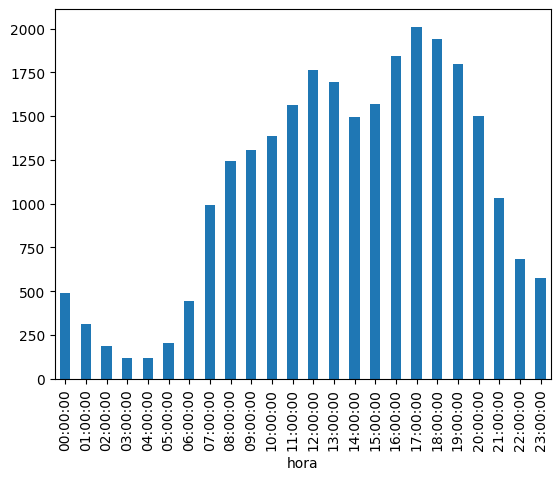

In [6]:
data = data[((data["LATITUD"] == -34.536980) & (data["LONGITUD"] == -58.470968))]
(data.groupby(['hora']).mean()["CANTIDAD"]).plot(kind = "bar")

In [4]:
#Guarda la tabla como csv
dist = data.groupby(['hora']).mean()["CANTIDAD"]

dist = dist.astype(int)
print(dist)
dist.to_csv("distribucion_hora.csv")

hora
00:00:00     487
01:00:00     315
02:00:00     184
03:00:00     117
04:00:00     118
05:00:00     205
06:00:00     446
07:00:00     992
08:00:00    1242
09:00:00    1306
10:00:00    1385
11:00:00    1560
12:00:00    1765
13:00:00    1696
14:00:00    1494
15:00:00    1570
16:00:00    1840
17:00:00    2010
18:00:00    1942
19:00:00    1795
20:00:00    1501
21:00:00    1030
22:00:00     683
23:00:00     576
Name: CANTIDAD, dtype: int64


/var/folders/rd/w2lzvnwn6wn0fxq5swgwlkp40000gn/T/ipykernel_87483/1684299799.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dist = data.groupby(['hora']).mean()["CANTIDAD"]


<BarContainer object of 24 artists>

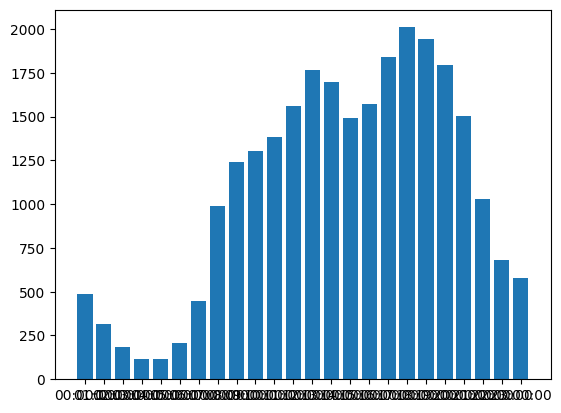

In [5]:
plt.bar(dist.index, dist.values)

<Axes: >

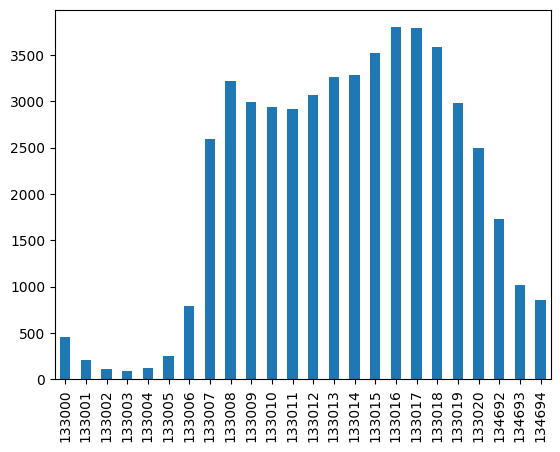

In [23]:
data[data['dia'] == "13OCT2021"]["CANTIDAD"].plot(kind = "bar")